In [43]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from IPython.display import display_html

In [44]:
# loading files to a dataframe from the path specified
vars_df=pd.read_csv('Output/clean_data.csv', low_memory=False)

In [45]:
# Extracting data having numdays less than 15 days.
vars_clean_df=vars_df.loc[vars_df.NUMDAYS<15]
vars_clean_df

,Unnamed: 0,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,HOSP_VISIT
1,1,413803,01/01/2011,TN,67,F,NaN,NaN,NaN,NaN,...,NaN,U,0.0,1,NaN,01/01/2011,FLU3,CSL LIMITED,UNK,NaN
2,2,413804,01/01/2011,MN,62,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,1,NaN,01/01/2011,PPV,UNKNOWN MANUFACTURER,1,NaN
4,4,413830,01/01/2011,TN,76,M,NaN,NaN,NaN,NaN,...,NaN,N,9.0,1,NaN,12/28/2010,FLU3,NOVARTIS VACCINES AND DIAGNOSTICS,UNK,Y
5,5,413833,01/01/2011,GA,52,F,NaN,NaN,NaN,NaN,...,NaN,U,1.0,1,NaN,01/01/2011,FLU3,NOVARTIS VACCINES AND DIAGNOSTICS,UNK,NaN
6,6,413809,01/02/2011,AZ,31,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,1,NaN,01/02/2011,HEP,GLAXOSMITHKLINE BIOLOGICALS,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603023,603023,1442853,07/02/2021,TX,30,M,NaN,NaN,NaN,NaN,...,NaN,N,2.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,1,Y
603024,603024,1442854,07/02/2021,FL,17,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,2,NaN
603026,603026,1442856,07/02/2021,CA,37,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,1,NaN
603027,603027,1442857,07/02/2021,DE,69,F,NaN,NaN,NaN,NaN,...,NaN,N,4.0,2,None known,07/02/2021,COVID19,PFIZER\BIONTECH,2,YY


In [46]:
# bins created for getting a range
bins = [10, 20,40,60,80,120]

# label for the bins
age_group = ['10-20', '20-40', '40-60', '60-80', '80+']

# A column 'Age Ranges' added and the dataframe cuts based on the label
vars_clean_df['Age Ranges']=pd.cut(vars_clean_df.AGE_YRS, bins, labels=age_group)

# Dataframe sorted based Age and grouped by Age Ranges and Numdays.
age_vars_died_df=vars_clean_df.sort_values('AGE_YRS').groupby(['Age Ranges','VAX_TYPE', 'NUMDAYS'])['DIED'].count()
age_vars=age_vars_died_df.reset_index()
age_data=age_vars.copy()
age_vars

<ipython-input-46-fcdafd5c2c35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_clean_df['Age Ranges']=pd.cut(vars_clean_df.AGE_YRS, bins, labels=age_group)


,Age Ranges,VAX_TYPE,NUMDAYS,DIED
0,10-20,6VAX-F,0.0,0
1,10-20,6VAX-F,1.0,0
2,10-20,6VAX-F,2.0,0
3,10-20,6VAX-F,3.0,0
4,10-20,6VAX-F,4.0,0
...,...,...,...,...
6220,80+,YF,10.0,0
6221,80+,YF,11.0,0
6222,80+,YF,12.0,0
6223,80+,YF,13.0,0


In [47]:
# Filtering the data by Covid19 vax_type and Age Ranges
numdays_10_20=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='10-20') & (age_vars.DIED != 0)]

numdays_20_40=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='20-40') & (age_vars.DIED != 0)]

numdays_40_60=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='40-60') & (age_vars.DIED != 0)]

numdays_60_80=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='60-80') & (age_vars.DIED != 0)]

numdays_80_plus=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='80+') & (age_vars.DIED != 0)]
numdays_80_plus

,Age Ranges,VAX_TYPE,NUMDAYS,DIED
5055,80+,COVID19,0.0,219
5056,80+,COVID19,1.0,278
5057,80+,COVID19,2.0,122
5058,80+,COVID19,3.0,76
5059,80+,COVID19,4.0,61
5060,80+,COVID19,5.0,57
5061,80+,COVID19,6.0,40
5062,80+,COVID19,7.0,53
5063,80+,COVID19,8.0,36
5064,80+,COVID19,9.0,37


In [48]:
# Filtering data by Non-Covid19 vaccines and Age Ranges
nonCovid_10_20=age_vars.loc[(age_vars['VAX_TYPE'] !='COVID19') & (age_vars['Age Ranges']=='10-20') & (age_vars.DIED != 0)]
other_vax_10_20=nonCovid_10_20.groupby(['NUMDAYS'])['DIED'].sum().reset_index()

nonCovid_20_40=age_vars.loc[(age_vars['VAX_TYPE'] !='COVID19') & (age_vars['Age Ranges']=='20-40') & (age_vars.DIED != 0)]
other_vax_20_40=nonCovid_20_40.groupby(['NUMDAYS'])['DIED'].sum().reset_index()

nonCovid_40_60=age_vars.loc[(age_vars['VAX_TYPE'] !='COVID19') & (age_vars['Age Ranges']=='40-60') & (age_vars.DIED != 0)]
other_vax_40_60=nonCovid_40_60.groupby(['NUMDAYS'])['DIED'].sum().reset_index()

nonCovid_60_80=age_vars.loc[(age_vars['VAX_TYPE'] !='COVID19') & (age_vars['Age Ranges']=='60-80') & (age_vars.DIED != 0)]
other_vax_60_80=nonCovid_60_80.groupby(['NUMDAYS'])['DIED'].sum().reset_index()

nonCovid_80_plus=age_vars.loc[(age_vars['VAX_TYPE'] !='COVID19') & (age_vars['Age Ranges']=='80+') & (age_vars.DIED != 0)]
other_vax_80_plus=nonCovid_80_plus.groupby(['NUMDAYS'])['DIED'].sum().reset_index()
other_vax_80_plus

,NUMDAYS,DIED
0,0.0,42
1,1.0,25
2,2.0,15
3,3.0,4
4,4.0,1
5,5.0,3
6,6.0,2
7,7.0,3
8,8.0,3
9,9.0,3


* Vizualisation of line graph tried to figure out the ultimate adversity (death) happened after Covid19 vaccines and Non-Covid19 vaccines within 14 days in different age group.

* Days shown in vizualisation is the difference between vaccination date to adversity happened date.

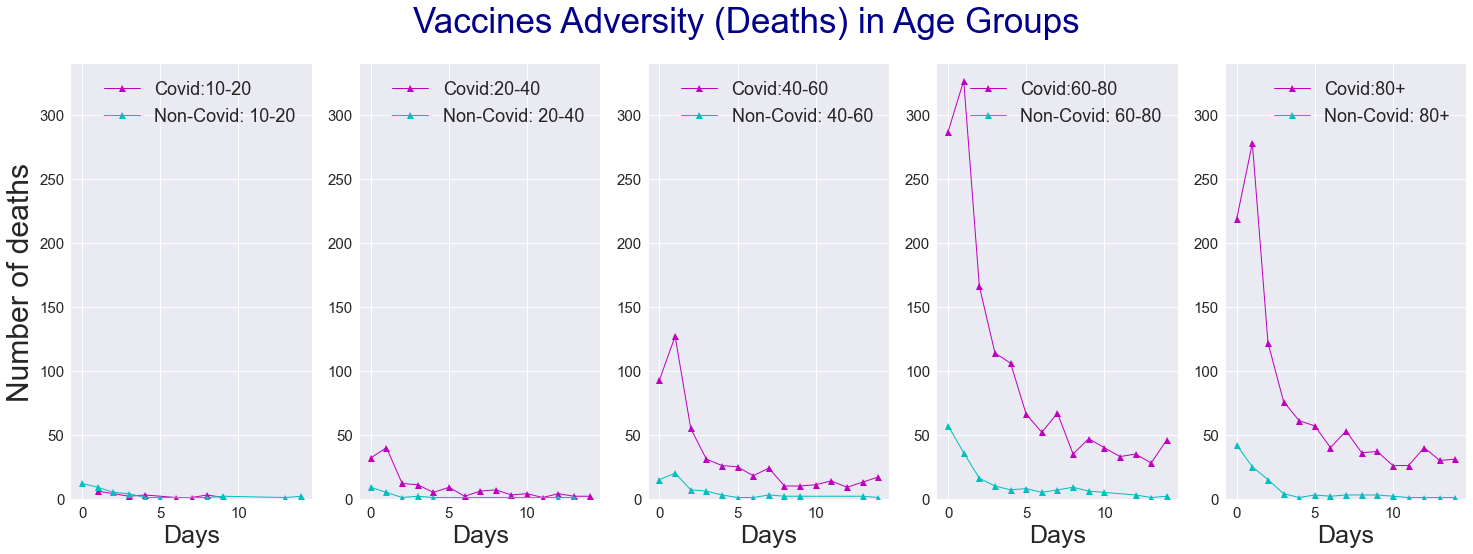

In [49]:
plt.style.use('seaborn')

# Line plotting with covid19 and Non-Covid19 vaccines
fig, (bx1,bx2,bx3,bx4,bx5) = plt.subplots(1,5, figsize=(25,8))

font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}

# Setting title
fig.suptitle('Vaccines Adversity (Deaths) in Age Groups',fontsize=35, color='darkblue')

# Setting y-label
bx1.set_ylabel('Number of deaths', fontsize=30)

# plotting line graph
bx1.plot(numdays_10_20.NUMDAYS,numdays_10_20.DIED, marker='^', color='m', linewidth=1, label='Covid:10-20')
bx1.plot(other_vax_10_20.NUMDAYS,other_vax_10_20.DIED,marker='^', linewidth=1, color="c", label='Non-Covid: 10-20')

# Setting the scale y-axis limit
bx1.set_ylim(0, 340)

# Setting xlabel and font size
bx1.set_xlabel('Days', fontsize=25) 

# Making scale sizes (x-axis and y-axis) large
bx1.tick_params(axis='both', labelsize=15)

# Setting legend
bx1.legend(loc='best', fontsize=18)

# Plotting age group 20-40 for Covid19 and Non-Covid19 cases
bx2.plot(numdays_20_40.NUMDAYS,numdays_20_40.DIED, marker='^', color='m', linewidth=1, label='Covid:20-40')
bx2.plot(other_vax_20_40.NUMDAYS,other_vax_20_40.DIED,marker='^', linewidth=1, color="c", label='Non-Covid: 20-40')

# Style formatting
bx2.tick_params(axis='both', labelsize=15)
bx2.set_ylim(0, 340)
bx2.set_xlabel('Days', fontsize=25)
bx2.legend(loc='best', fontsize=18)

# Plotting age group 40-60 for Covid19 and Non-Covid19 cases
bx3.plot(numdays_40_60.NUMDAYS,numdays_40_60.DIED, marker='^', color='m', linewidth=1, label='Covid:40-60')
bx3.plot(other_vax_40_60.NUMDAYS,other_vax_40_60.DIED,marker='^', linewidth=1, color="c", label='Non-Covid: 40-60')

# Style formatting
bx3.tick_params(axis='both', labelsize=15)
bx3.set_ylim(0, 340)
bx3.set_xlabel('Days', fontsize=25)
bx3.legend(loc='best', fontsize=18)

# Plotting age group 60-80 for Covid19 and Non-Covid19 cases
bx4.plot(numdays_60_80.NUMDAYS,numdays_60_80.DIED, marker='^', color='m', linewidth=1, label='Covid:60-80')
bx4.plot(other_vax_60_80.NUMDAYS,other_vax_60_80.DIED,marker='^', linewidth=1, color="c", label='Non-Covid: 60-80')

# Style formatting
bx4.tick_params(axis='both', labelsize=15)
bx4.set_ylim(0, 340)
bx4.set_xlabel('Days', fontsize=25)
bx4.legend(loc='best', fontsize=18)

# Plotting age group 80+ for Covid19 and Non-Covid19 cases
bx5.plot(numdays_80_plus.NUMDAYS,numdays_80_plus.DIED, marker='^', color='m', linewidth=1, label='Covid:80+')
bx5.plot(other_vax_80_plus.NUMDAYS,other_vax_80_plus.DIED,marker='^', linewidth=1, color="c", label='Non-Covid: 80+')

# Style formatting
bx5.tick_params(axis='both', labelsize=15)
bx5.set_ylim(0, 340)
bx5.set_xlabel('Days', fontsize=25)
bx5.legend(loc='best', fontsize=18)

# Saving figure in PNG folder
plt.savefig('PNG/lineAdversity.png')
plt.show()

* The above graph, age group 60-80 and 80+ are showing more deaths than other age groups.  But an interesting inference is most of the adversity happened within 1-4 days. Then, it is showing a decreasing tendency means first four days are more critical for vaccination.

In [50]:

# Extracting daraframe only having COVID19
pie_covid_df=vars_clean_df.loc[vars_clean_df.VAX_TYPE=='COVID19']
sex_covid_df=pie_covid_df.copy()

# Sorting values by Age group 
pie_vars_df=pie_covid_df.sort_values(by='AGE_YRS').groupby(['Age Ranges'])['DIED'].count()
df1=pie_vars_df.reset_index()

# Extracting dataframe excluding COVID19
pie_noncovid_df=vars_clean_df.loc[vars_clean_df.VAX_TYPE != 'COVID19']

# Sorting values by Age group 
pie_died_df=pie_noncovid_df.sort_values(by='AGE_YRS').groupby(['Age Ranges'])['DIED'].count()
df2=pie_died_df.reset_index()

# setting dataframes to display side by side 
sex_covid_pie_df = df1.style.set_table_attributes("style='display:inline'").set_caption('Covid19 Deaths based on Sex')
sex_nonCovid_pie_df = df2.style.set_table_attributes("style='display:inline'").set_caption('Non-Covid19 Deaths based on Sex')

# Displaying dataframes side by side
display_html(sex_covid_pie_df._repr_html_()+ "\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 " + sex_nonCovid_pie_df._repr_html_(), raw=True)


,Age Ranges,DIED
0,10-20,17
1,20-40,140
2,40-60,483
3,60-80,1449
4,80+,1132
,Age Ranges,DIED
0,10-20,38
1,20-40,20
2,40-60,63
3,60-80,172


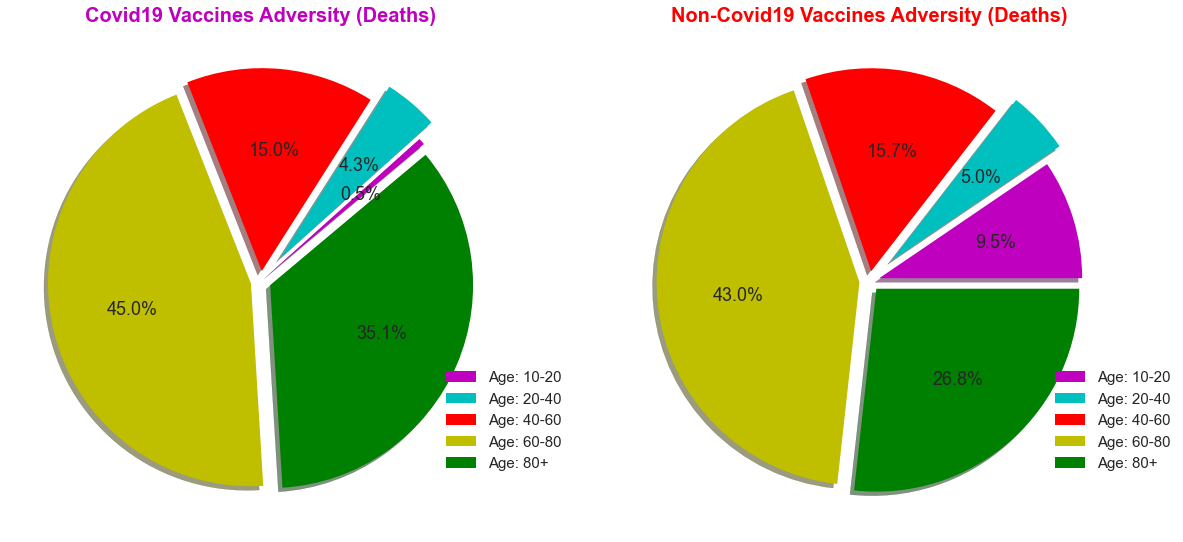

In [51]:
# Pie plotting for Covid19 and Non-Covid19 Vaccines
# To enlarge the numbers with percentage
plt.rcParams.update({'font.size': 18}) 

# Figure plotting 
fig, (bx1,bx2) = plt.subplots(1,2, figsize=(20,10))

# Style formatting
explode = (0.05,0.15,0.05,0.05,0.05)
colors=['m', 'c', 'r','y','g']

# Labels creating
labels=['Age: 10-20', 'Age: 20-40', 'Age: 40-60', 'Age: 60-80', 'Age: 80+']

# Pie chart title
bx1.set_title("Covid19 Vaccines Adversity (Deaths)", color='m', fontsize=20, fontweight='bold', y=1.00)

# Pie charting
bx1.pie(pie_vars_df,colors = colors,autopct = '%1.1f%%', explode=explode, startangle=40,
        radius=1.0, shadow=True)

# Setting legend
bx1.legend(labels=labels, loc='lower right', fontsize=15, bbox_to_anchor=(0.77, 0.1, 0.35, 1))

# Title setting
bx2.set_title("Non-Covid19 Vaccines Adversity (Deaths)",color='r', fontsize=20, fontweight='bold', y=1.00)

# Non-covid pie chart
bx2.pie(pie_died_df, colors = colors,autopct = '%1.1f%%',radius=1.0, explode=explode, shadow=True) #plot second pie

# Legend setting
bx2.legend(labels=labels, loc='lower right', fontsize=15, bbox_to_anchor=(0.77, 0.1, 0.35, 1))

# Saving the figure
plt.savefig('PNG/pieAdversity.png')

plt.show()

* The pie graph is visualizing percentage wise analysis of Covid19 and Non-Covid19 Adversity (Deaths) in age group.  In both cases 60-80 and 80+ age group shows highest percentage. In terms of number of deaths the table above is showing very high number of deaths in Covid19 cases than Non-Covid19 cases.

In [52]:
from IPython.display import display_html

# Dataframe based on sex, age group and adversity (died) in Covid cases.
# Filtering column VAX_TYPE by COVID19
sex_covid_df=vars_clean_df.loc[vars_clean_df['VAX_TYPE'].isin(['COVID19'])]

# Sorting values by Age Ranges and grouped by Age Ranges, Sex
sex_covid_df=sex_covid_df.sort_values(by='Age Ranges').groupby(['Age Ranges', 'SEX'])['DIED'].count().reset_index()

# Dataframe based on sex, age group and adversity (died) in Non-Covid cases.
# Filtering column VAX_TYPE by COVID19
sex_nonCovid_df=vars_clean_df.loc[vars_clean_df['VAX_TYPE']!='COVID19']

# Sorting values by Age Ranges and grouped by Age Ranges, Sex
sex_nonCovid_df=sex_nonCovid_df.sort_values(by='Age Ranges').groupby(['Age Ranges', 'SEX'])['DIED'].count().reset_index()

# setting dataframes to display side by side 
sex_covid_df_styler = sex_covid_df.style.set_table_attributes("style='display:inline'").set_caption('Covid19 Deaths based on Sex')
sex_nonCovid_df_styler = sex_nonCovid_df.style.set_table_attributes("style='display:inline'").set_caption('Non-Covid19 Deaths based on Sex')

# Displaying dataframes side by side
display_html(sex_covid_df_styler._repr_html_()+ "\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 " + sex_nonCovid_df_styler._repr_html_(), raw=True)

,Age Ranges,SEX,DIED
0,10-20,F,6
1,10-20,M,11
2,10-20,U,0
3,20-40,F,44
4,20-40,M,96
5,20-40,U,0
6,40-60,F,204
7,40-60,M,275
8,40-60,U,4
9,60-80,F,581
